## Modules and data import

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)

from sklearn.metrics import rand_score, adjusted_rand_score

In [87]:
data = pd.read_csv('data.csv', sep=';')
X = data.drop('Target', axis=1)

### PCA with normalized data

In [88]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)
data_scaled = scaler.fit_transform(X) #normalized data

pca = PCA()
pca.fit(data_scaled)
scores_for_normalizedData = pca.transform(data_scaled)

explain_var = pca.explained_variance_ratio_
print(f"PC{1} explains {explain_var[0]*100:.2f}% of variance")
print(f"PC{2} explains {explain_var[1]*100:.2f}% of variance")

PC1 explains 17.67% of variance
PC2 explains 9.89% of variance


### PCA with raw data

In [89]:
pca = PCA()
pca.fit(X)
scores_for_rawData = pca.transform(X)

explain_var = pca.explained_variance_ratio_
print(f"PC{1} explains {explain_var[0]*100:.2f}% of variance")
print(f"PC{2} explains {explain_var[1]*100:.2f}% of variance")

PC1 explains 99.93% of variance
PC2 explains 0.03% of variance


### Comparing results

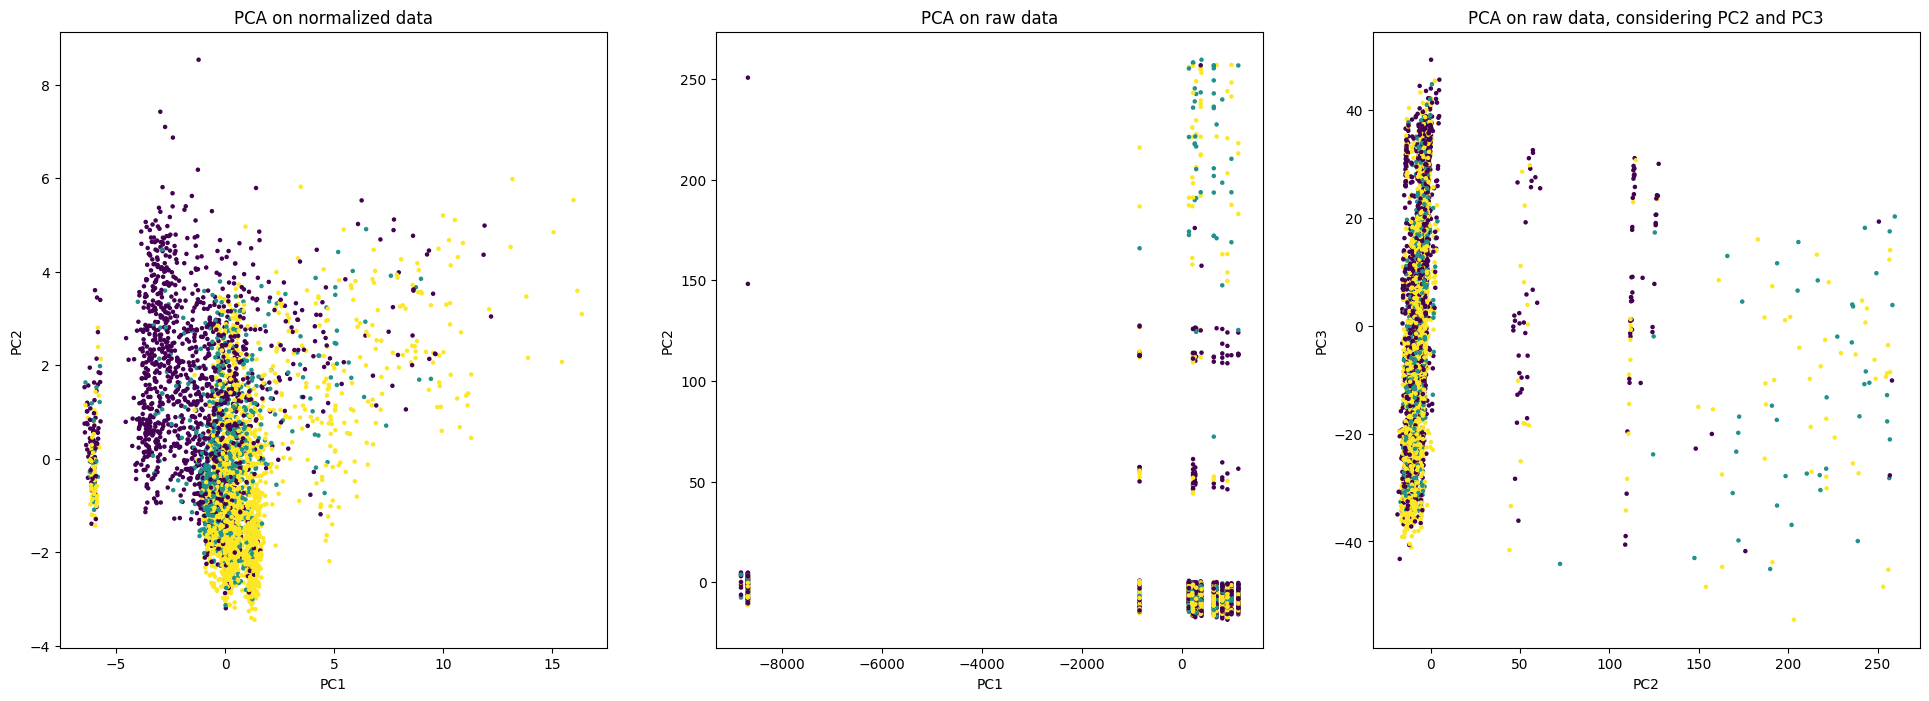

In [90]:
label2number = {'Dropout': 1, 'Enrolled': 2, 'Graduate': 3}
colors = [label2number[s] for s in data['Target']]

fig, ax = plt.subplots(1, 3, figsize=(24, 8))

i, j = 0, 1
ax[0].scatter(scores_for_normalizedData[:, i], scores_for_normalizedData[:, j], s=5, c=colors)
ax[0].set_xlabel(f'PC{i+1}')
ax[0].set_ylabel(f'PC{j+1}')
ax[0].set_title('PCA on normalized data')

i, j = 0, 1
ax[1].scatter(scores_for_rawData[:, i], scores_for_rawData[:, j], s=5, c=colors)
ax[1].set_xlabel(f'PC{i+1}')
ax[1].set_ylabel(f'PC{j+1}')
ax[1].set_title('PCA on raw data')

i, j = 1, 2
ax[2].scatter(scores_for_rawData[:, i], scores_for_rawData[:, j], s=5, c=colors)
ax[2].set_xlabel(f'PC{i+1}')
ax[2].set_ylabel(f'PC{j+1}')
ax[2].set_title('PCA on raw data, considering PC2 and PC3')

plt.show()

### K-Means clustering with normalized data

K=2: RandIndex = 0.5520, AdjRandIndex = 0.1747

K=3: RandIndex = 0.5570, AdjRandIndex = 0.1517

K=4: RandIndex = 0.6004, AdjRandIndex = 0.1592

K=5: RandIndex = 0.6014, AdjRandIndex = 0.1537

K=6: RandIndex = 0.6158, AdjRandIndex = 0.1760



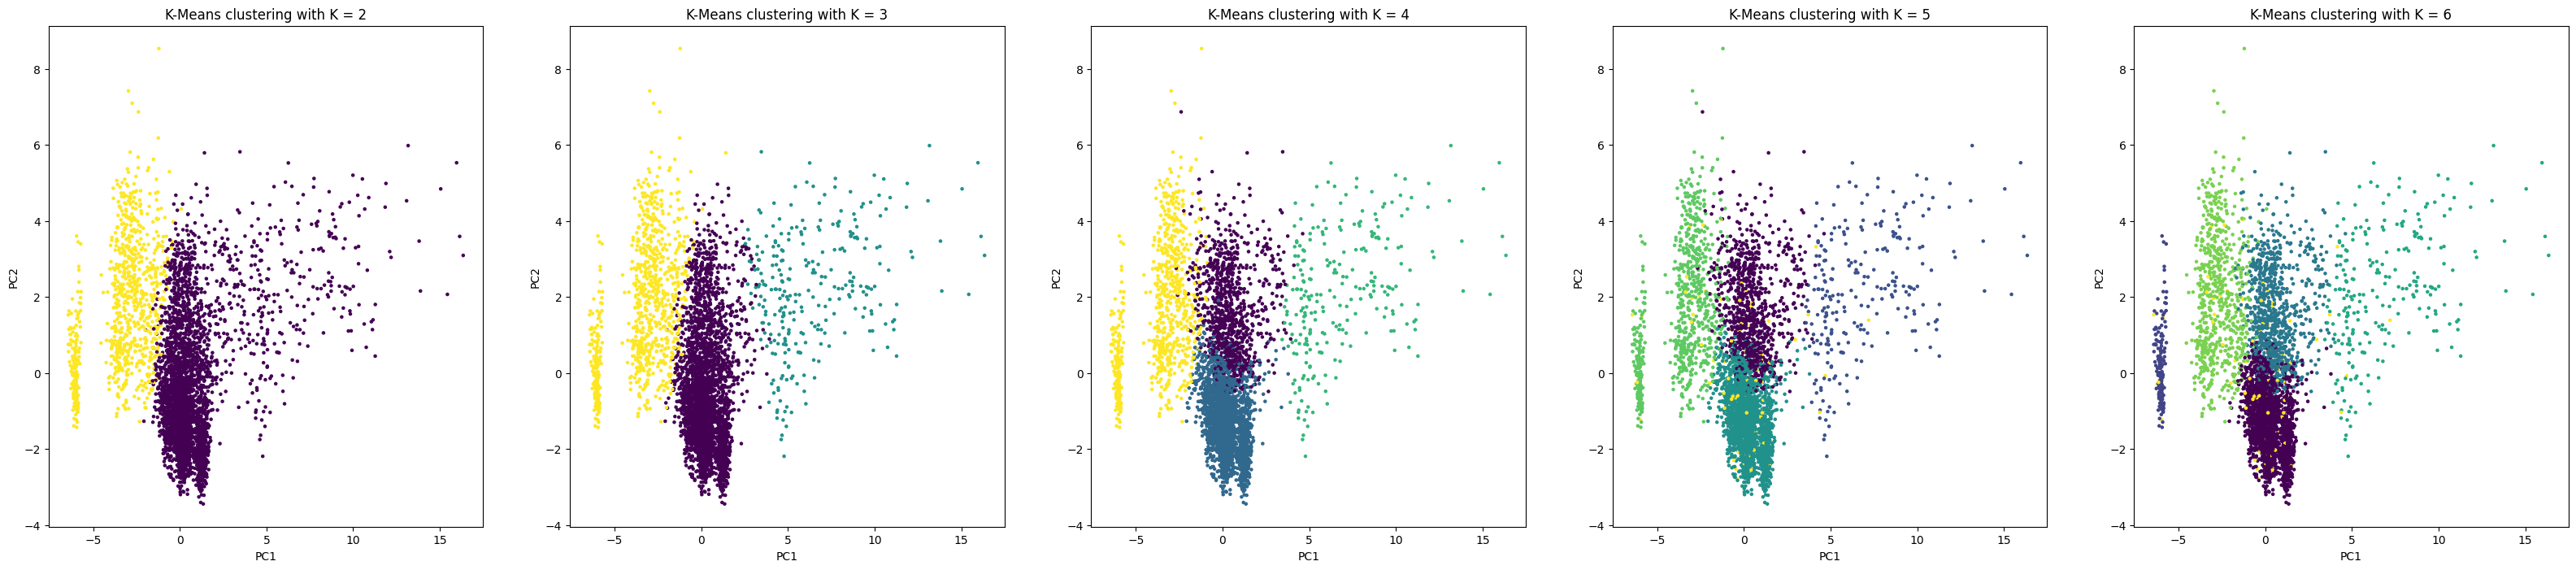

In [91]:
k_range = [2, 3, 4, 5, 6]

rand_indices_normal = []
adjusted_rand_indices_normal = []

rand_indices = []
adjusted_rand_indices = []

fig, ax = plt.subplots(1, 5, figsize=(40, 8))

for index, k in enumerate(k_range):
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(data_scaled)  #normalized data
    labels = kmeans.labels_

    rand_index = rand_score(data['Target'], labels)
    adjusted_rand_index = adjusted_rand_score(data['Target'], labels)
    rand_indices_normal.append(rand_index)
    adjusted_rand_indices_normal.append(adjusted_rand_index)

    ax[index].scatter(scores_for_normalizedData[:, 0], scores_for_normalizedData[:, 1], s=5, c=kmeans.labels_)
    ax[index].set_xlabel('PC1')
    ax[index].set_ylabel('PC2')
    ax[index].set_title(f'K-Means clustering with K = {k}')

    print(f'K={k}: RandIndex = {rand_index:.4f}, AdjRandIndex = {adjusted_rand_index:.4f}\n')
plt.show()

### K-Means clustering with raw data

K=2: RandIndex = 0.4094, AdjRandIndex = 0.0040

K=3: RandIndex = 0.5115, AdjRandIndex = 0.0028

K=4: RandIndex = 0.5213, AdjRandIndex = 0.0013

K=5: RandIndex = 0.5430, AdjRandIndex = 0.0031

K=6: RandIndex = 0.5670, AdjRandIndex = 0.0102



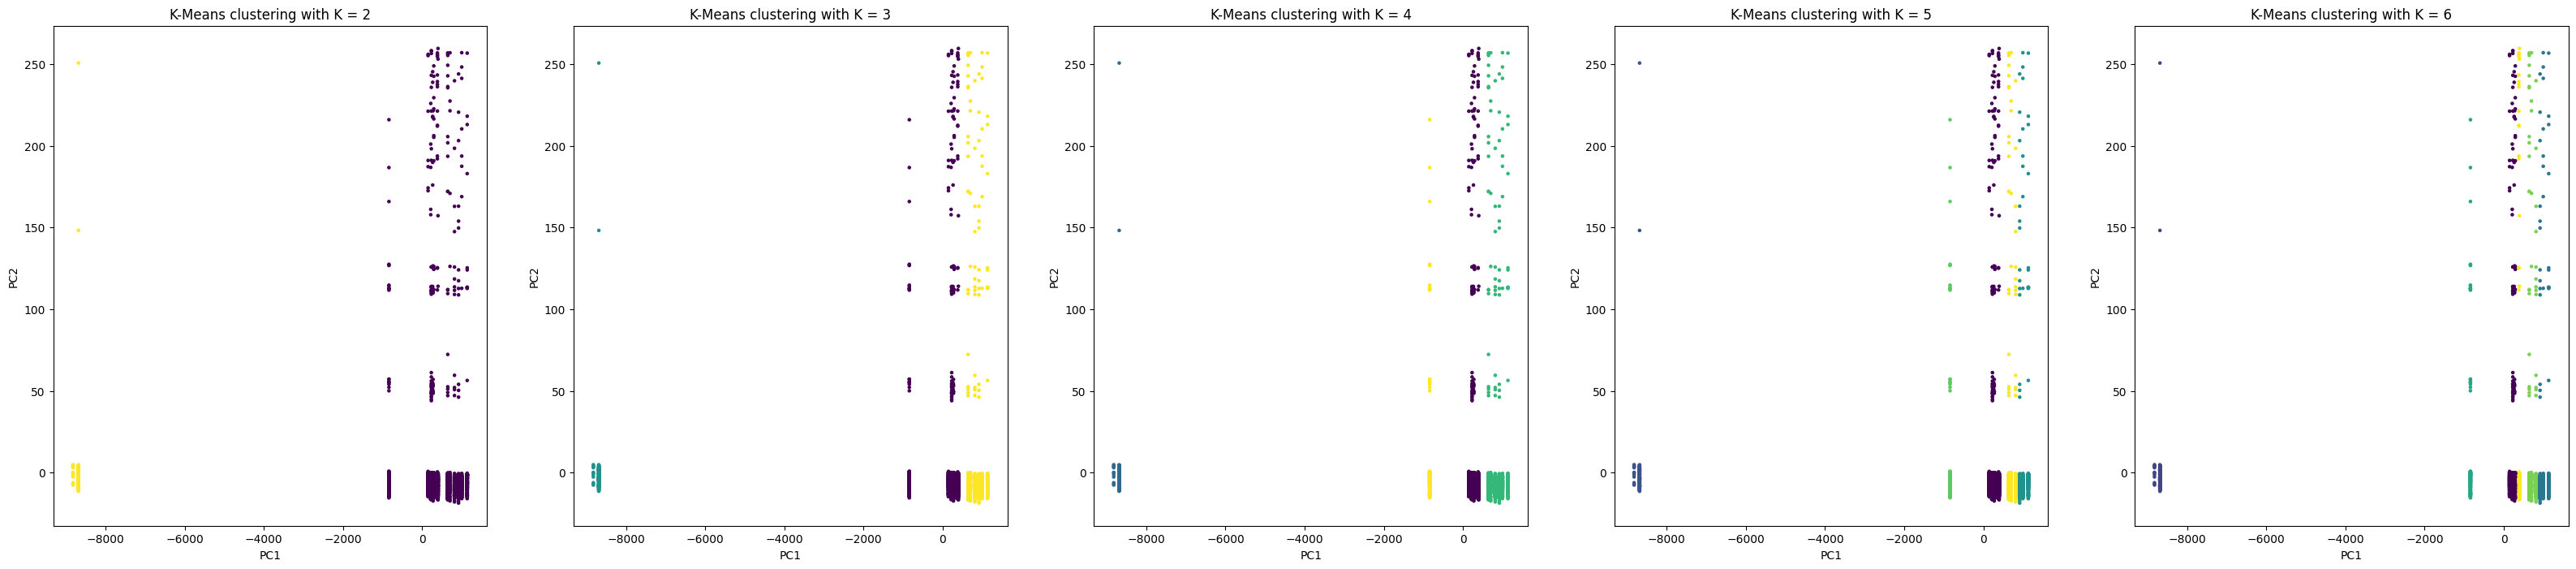

In [92]:
rand_indices = []
adjusted_rand_indices = []

fig, ax = plt.subplots(1, 5, figsize=(40, 8))

for index, k in enumerate(k_range):
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(X) #raw data
    labels = kmeans.labels_

    rand_index = rand_score(data['Target'], labels)
    adjusted_rand_index = adjusted_rand_score(data['Target'], labels)
    rand_indices.append(rand_index)
    adjusted_rand_indices.append(adjusted_rand_index)

    ax[index].scatter(scores_for_rawData[:, 0], scores_for_rawData[:, 1], s=5, c=kmeans.labels_)
    ax[index].set_xlabel('PC1')
    ax[index].set_ylabel('PC2')
    ax[index].set_title(f'K-Means clustering with K = {k}')

    print(f'K={k}: RandIndex = {rand_index:.4f}, AdjRandIndex = {adjusted_rand_index:.4f}\n')
plt.show()

### Results evaluation

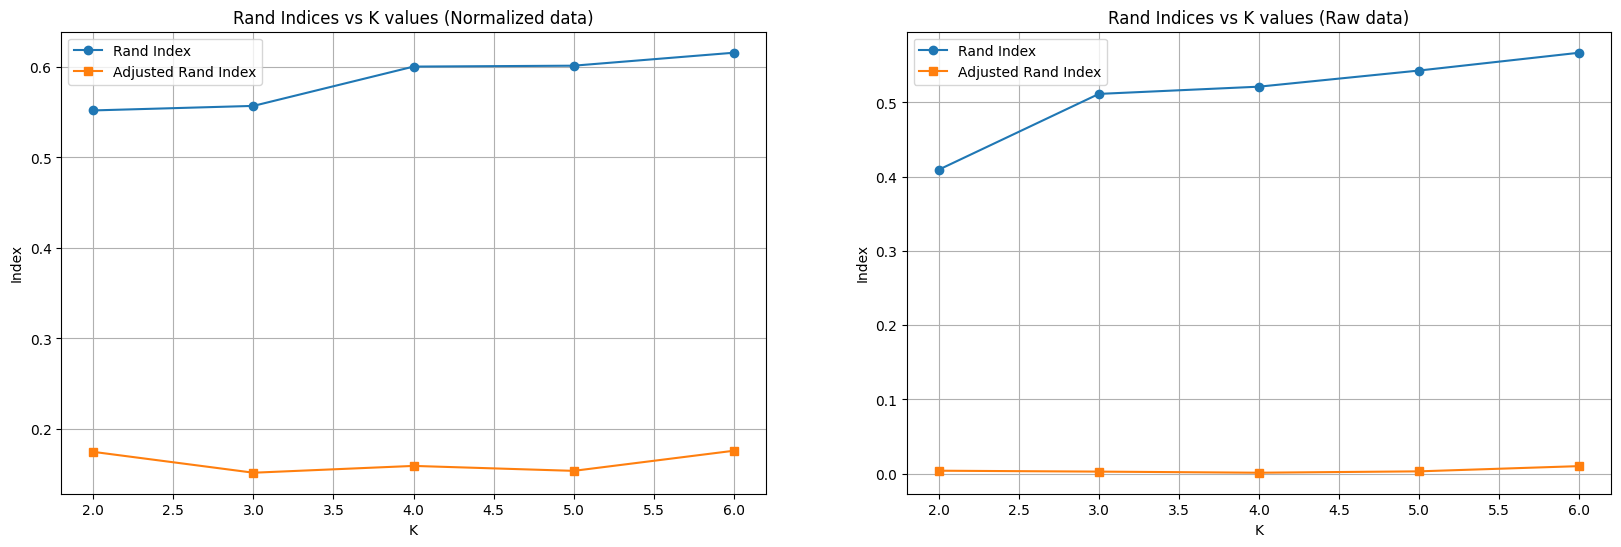

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(k_range, rand_indices_normal, marker='o', label='Rand Index')
ax[0].plot(k_range, adjusted_rand_indices_normal, marker='s', label='Adjusted Rand Index')
ax[0].set_xlabel('K')
ax[0].set_ylabel('Index')
ax[0].set_title('Rand Indices vs K values (Normalized data)')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(k_range, rand_indices, marker='o', label='Rand Index')
ax[1].plot(k_range, adjusted_rand_indices, marker='s', label='Adjusted Rand Index')
ax[1].set_xlabel('K')
ax[1].set_ylabel('Index')
ax[1].set_title('Rand Indices vs K values (Raw data)')
ax[1].legend()
ax[1].grid(True)

plt.show()

### Hierarchical clustering with normalized data

In [94]:
n_clusters_options = [2, 3, 4, 5] #params
metric_options = ['euclidean', 'manhattan']
linkage_options = ['ward', 'complete', 'average']

hc_results_normal = []
hc_results_raw = []

for n_clusters in n_clusters_options:
    for metric in metric_options:
        for linkage in linkage_options:
            if linkage == 'ward' and metric != 'euclidean':
                continue

            hc_comp = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage=linkage)
            hc_comp.fit(data_scaled)  # normalized data

            labels = hc_comp.labels_
            rand_index = rand_score(data['Target'], labels)
            adjusted_rand_index = adjusted_rand_score(data['Target'], labels)

            hc_results_normal.append({
                'n_clusters': n_clusters,
                'metric': metric,
                'linkage': linkage,
                'rand_index': rand_index,
                'adjusted_rand_index': adjusted_rand_index
            })

            plt.figure(figsize=(12, 6))
            plt.scatter(scores_for_normalizedData[:, 0], scores_for_normalizedData[:, 1], s=10, c=hc_comp.labels_)
            plt.xlabel('PC1')
            plt.ylabel('PC2')
            plt.title(f'H_Clustering (n_clusters={n_clusters}, metric={metric}, linkage={linkage})')
            plt.colorbar(label='Cluster')
            plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [95]:
hc_df = pd.DataFrame(hc_results_normal)
print(hc_df)

    n_clusters     metric   linkage  rand_index  adjusted_rand_index
0            2  euclidean      ward    0.404897            -0.010417
1            2  euclidean  complete    0.390358            -0.004298
2            2  euclidean   average    0.384569            -0.000504
3            2  manhattan  complete    0.410896            -0.009819
4            2  manhattan   average    0.384569            -0.000504
5            3  euclidean      ward    0.521801             0.101316
6            3  euclidean  complete    0.390400            -0.004268
7            3  euclidean   average    0.386405             0.000452
8            3  manhattan  complete    0.421157            -0.008030
9            3  manhattan   average    0.384892            -0.000487
10           4  euclidean      ward    0.530128             0.102568
11           4  euclidean  complete    0.392203            -0.003325
12           4  euclidean   average    0.386694             0.000753
13           4  manhattan  complet

### Hierarchical clustering with raw data

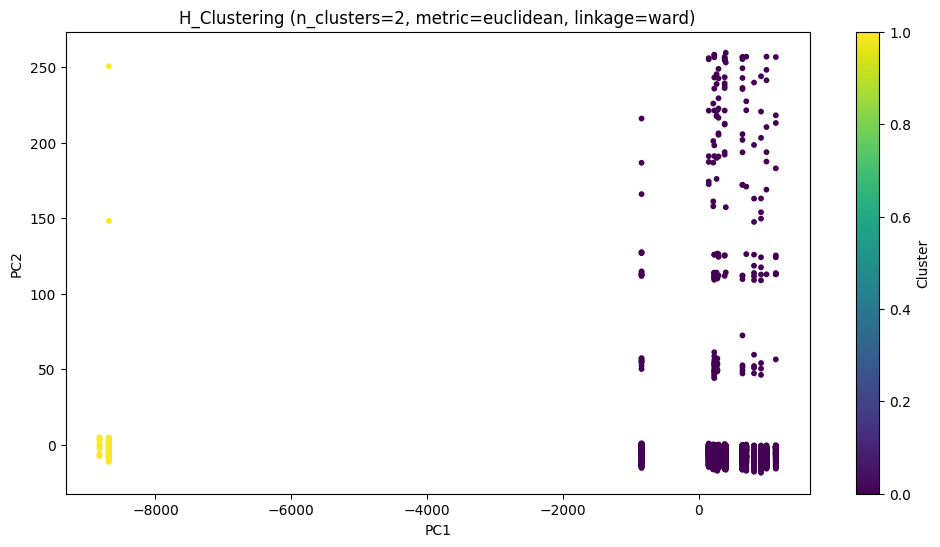

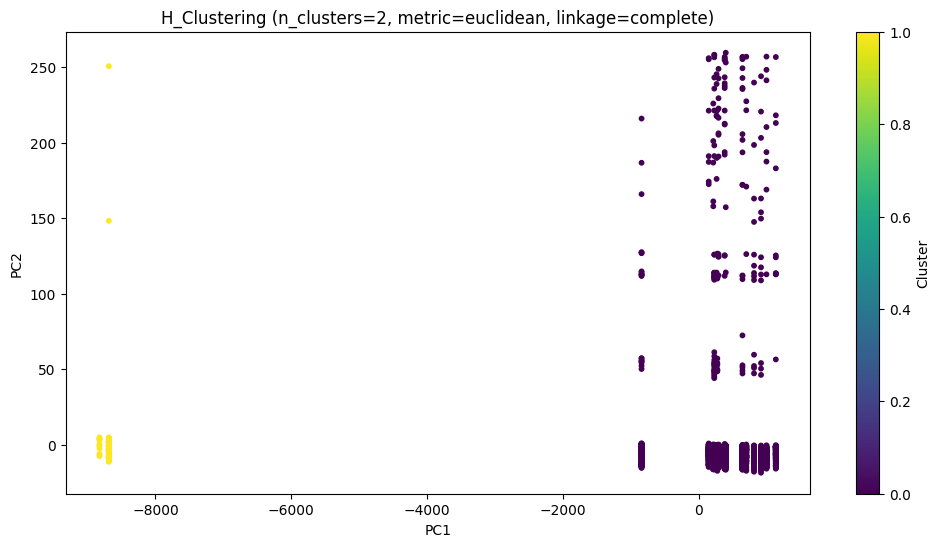

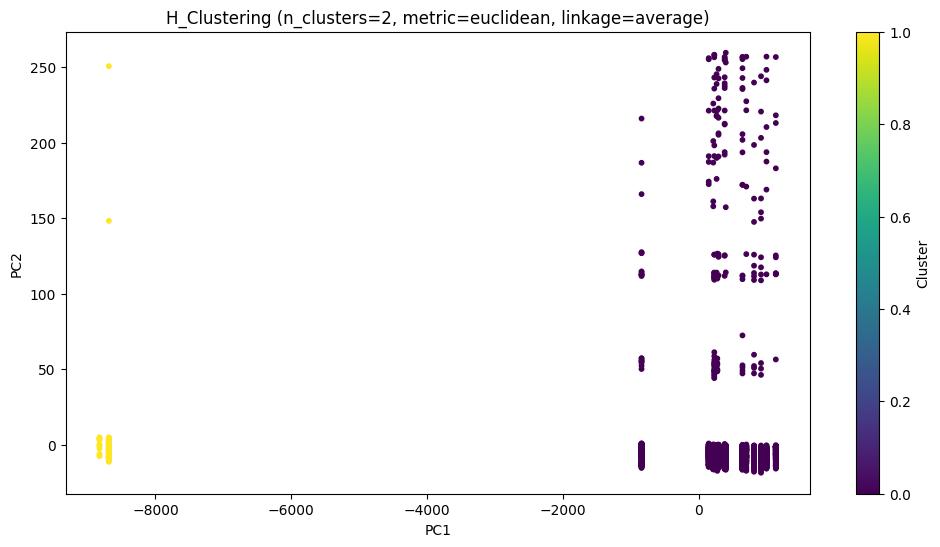

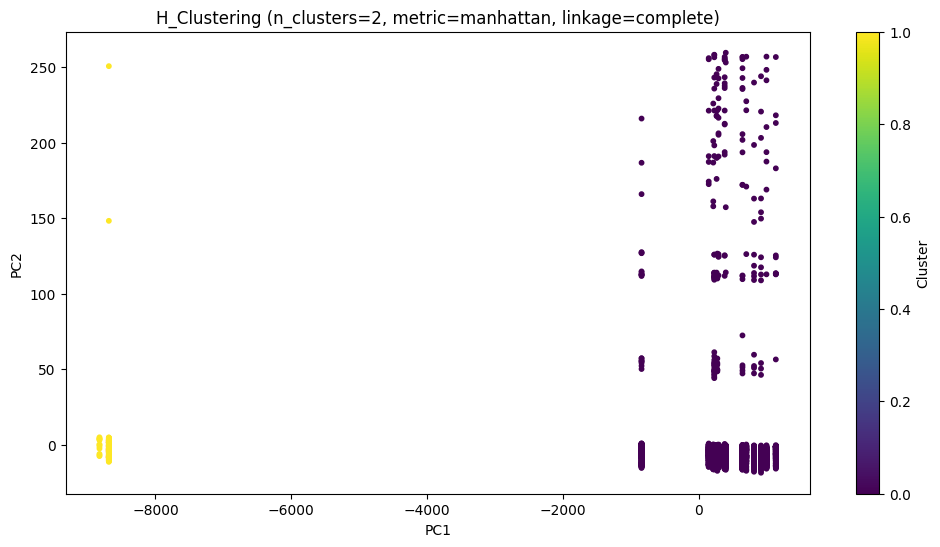

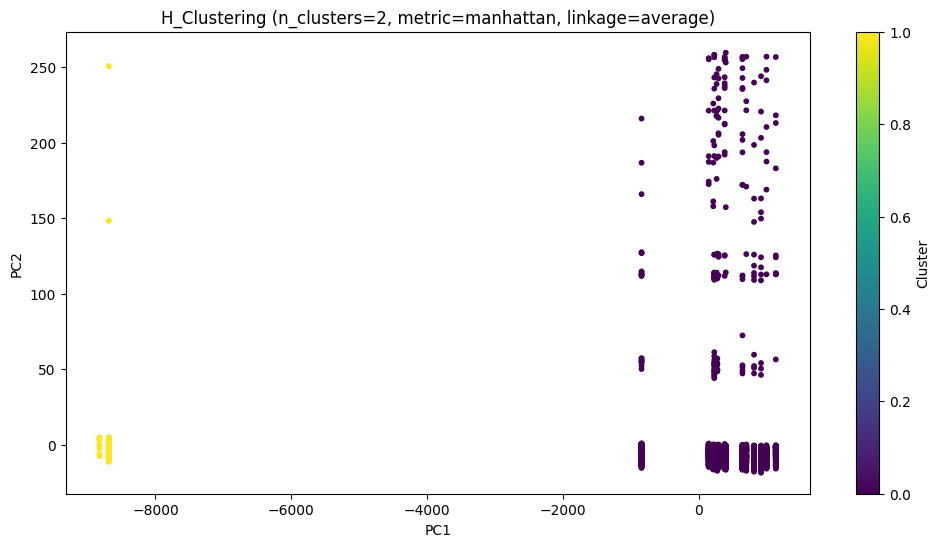

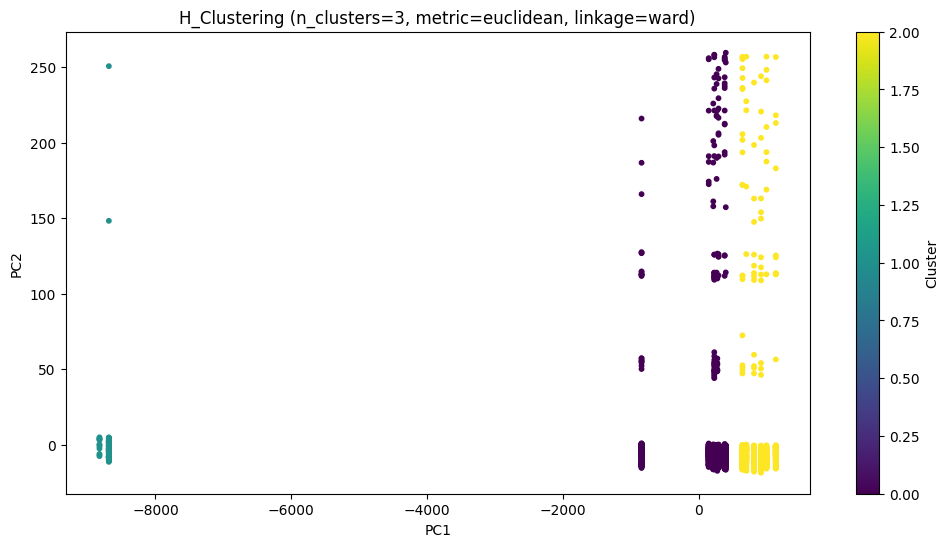

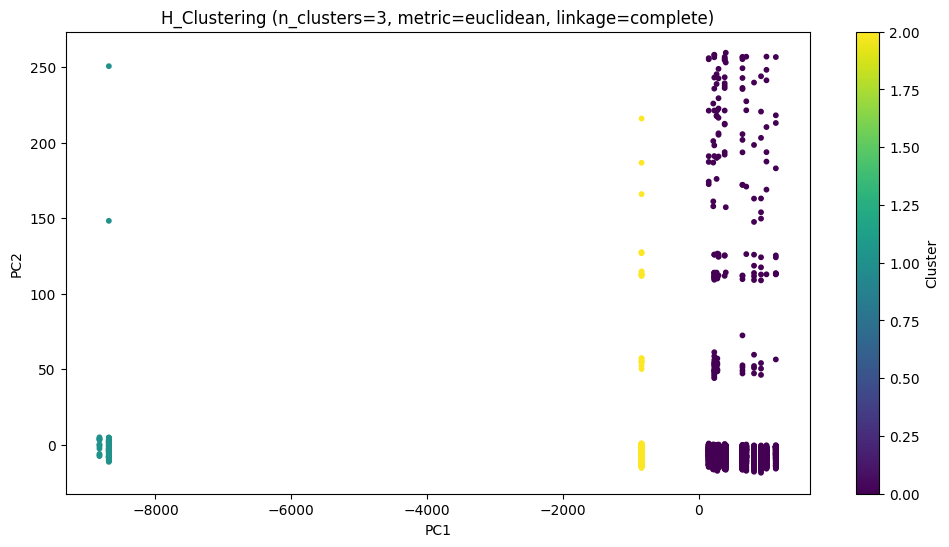

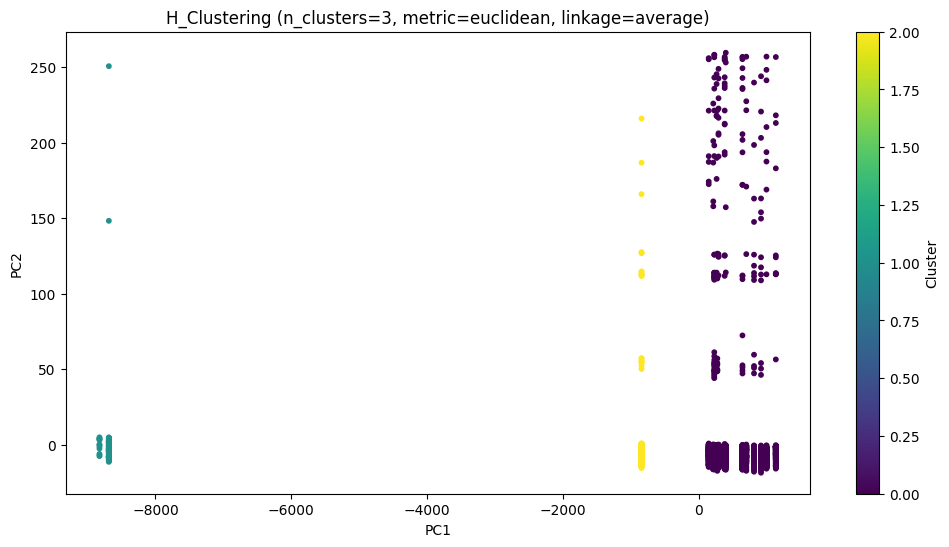

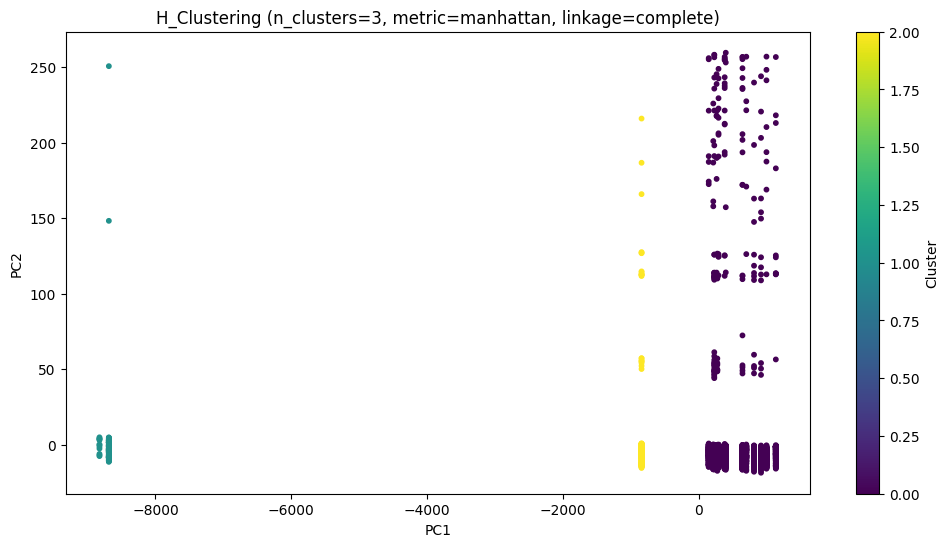

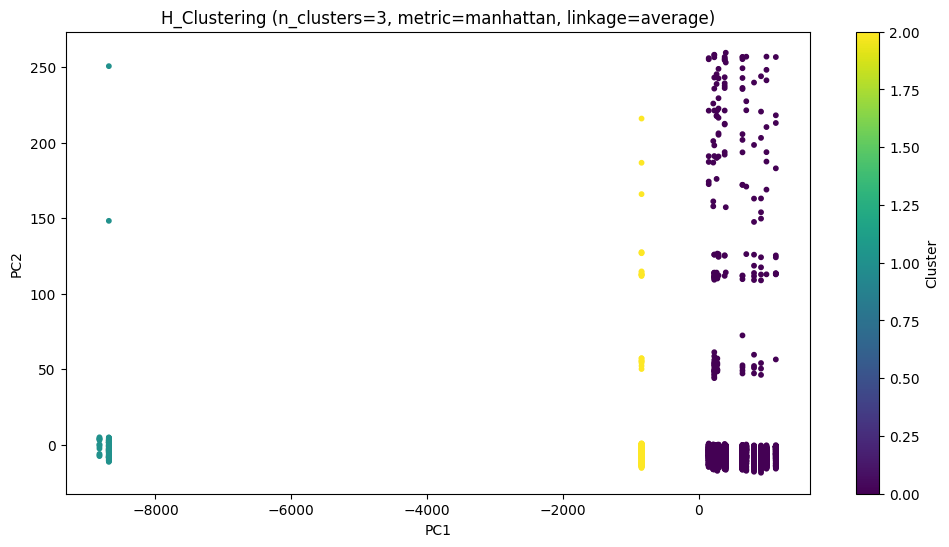

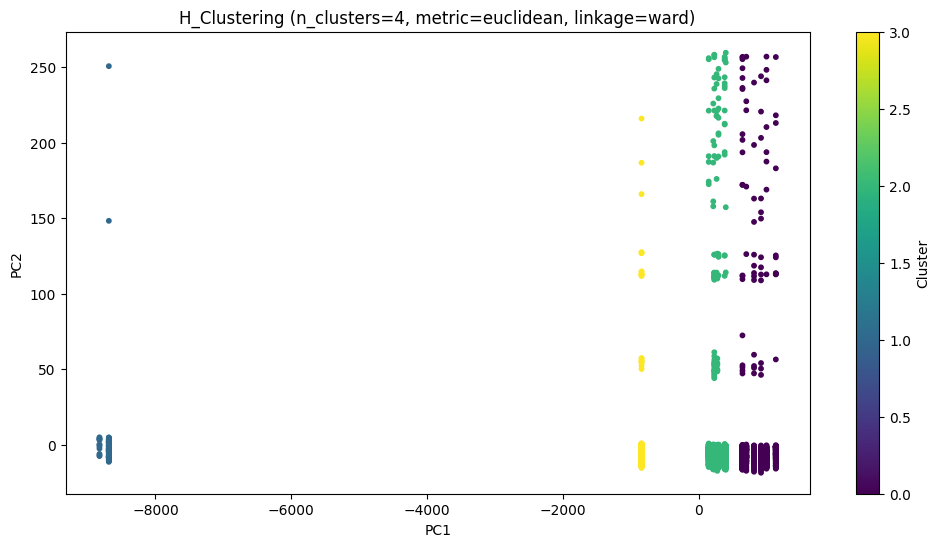

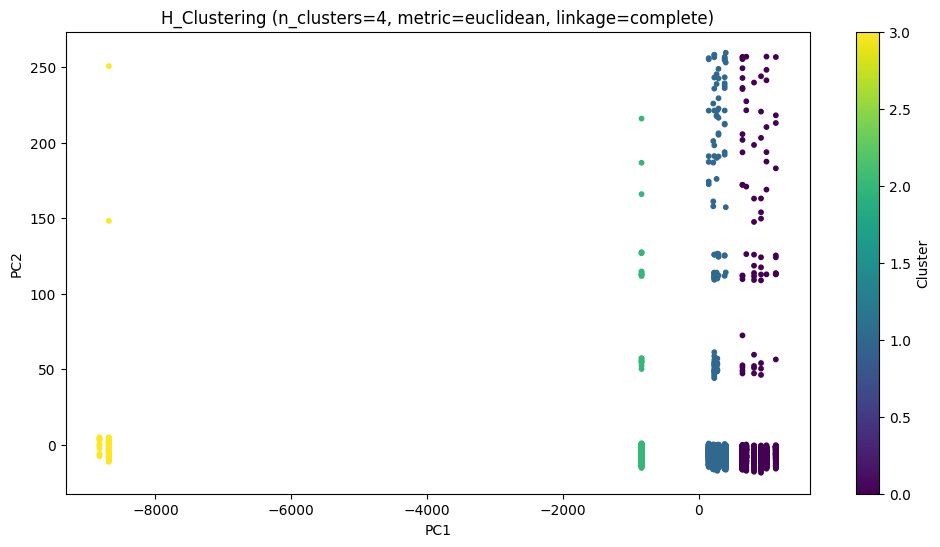

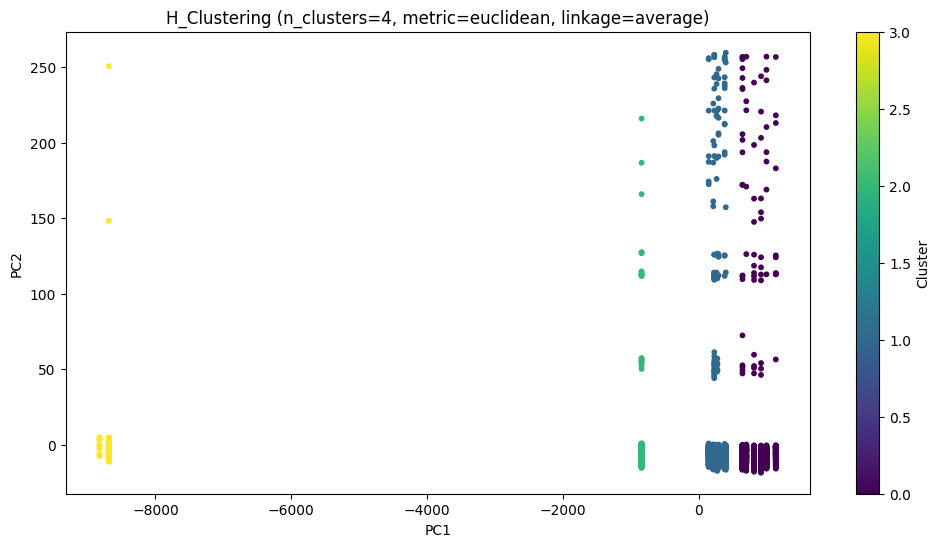

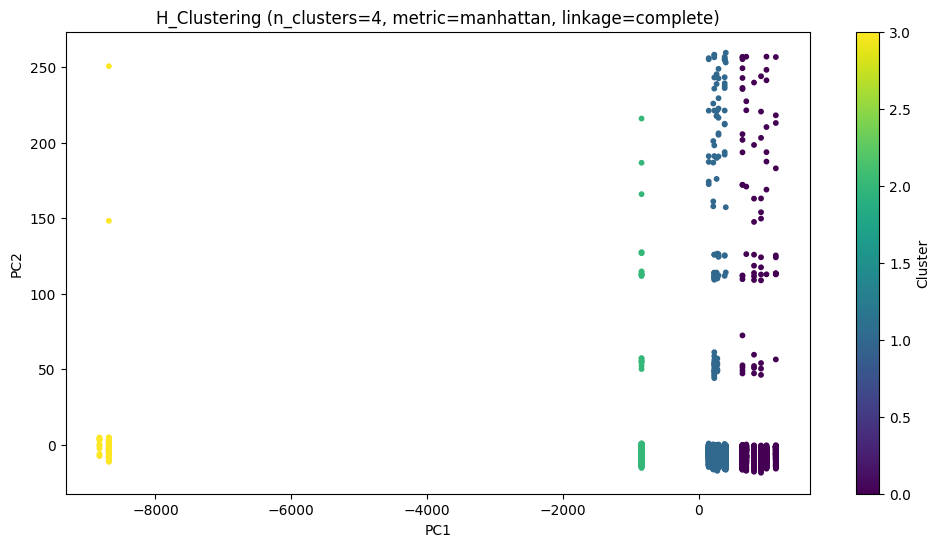

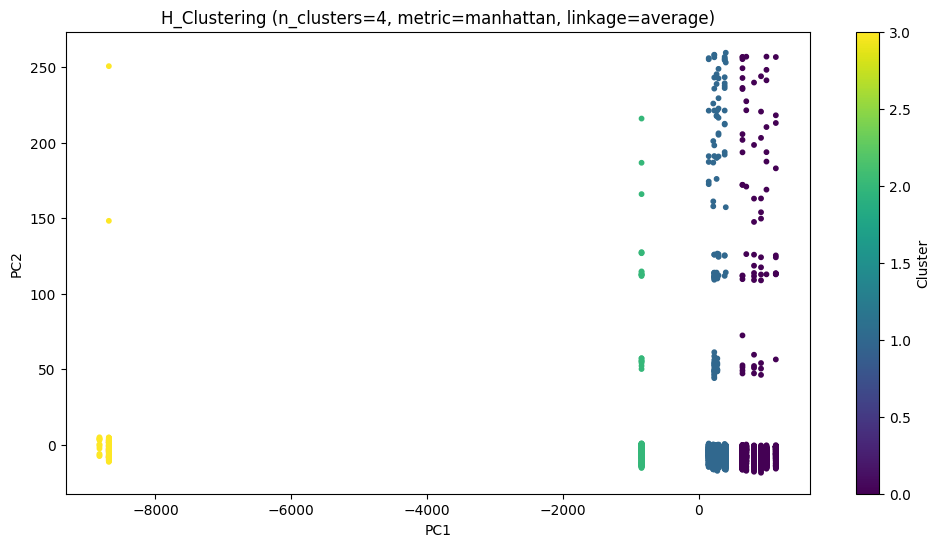

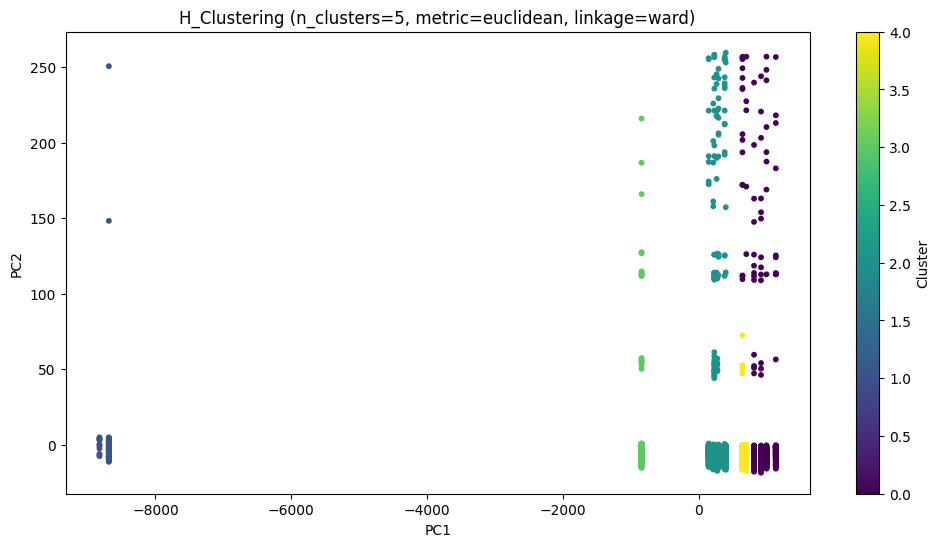

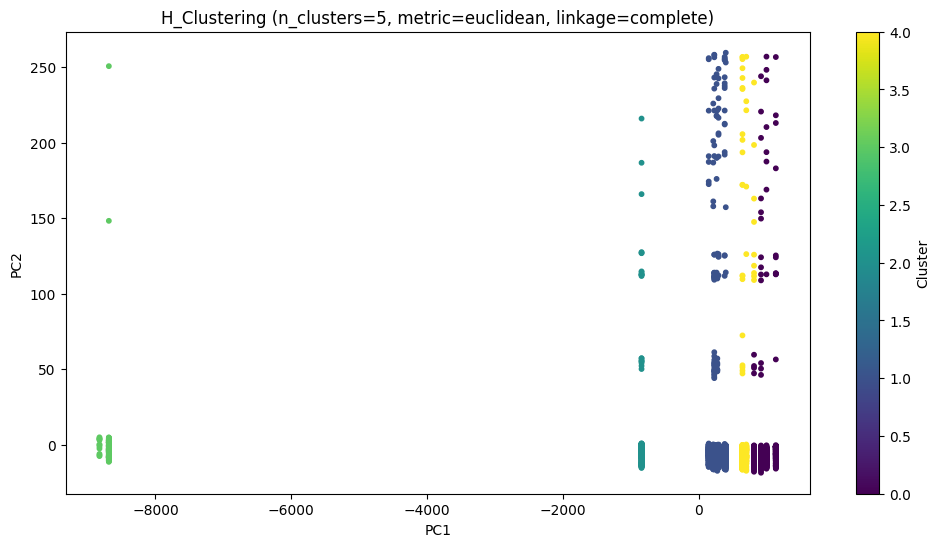

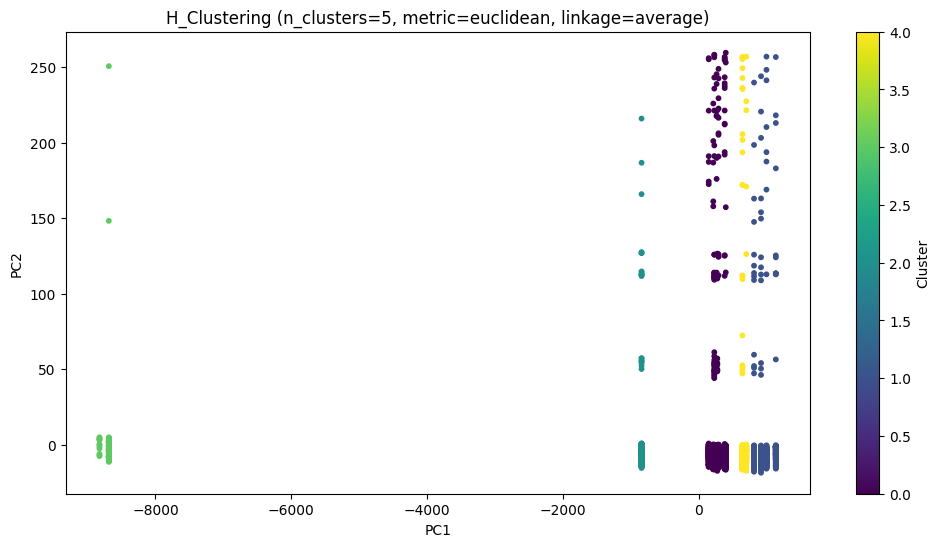

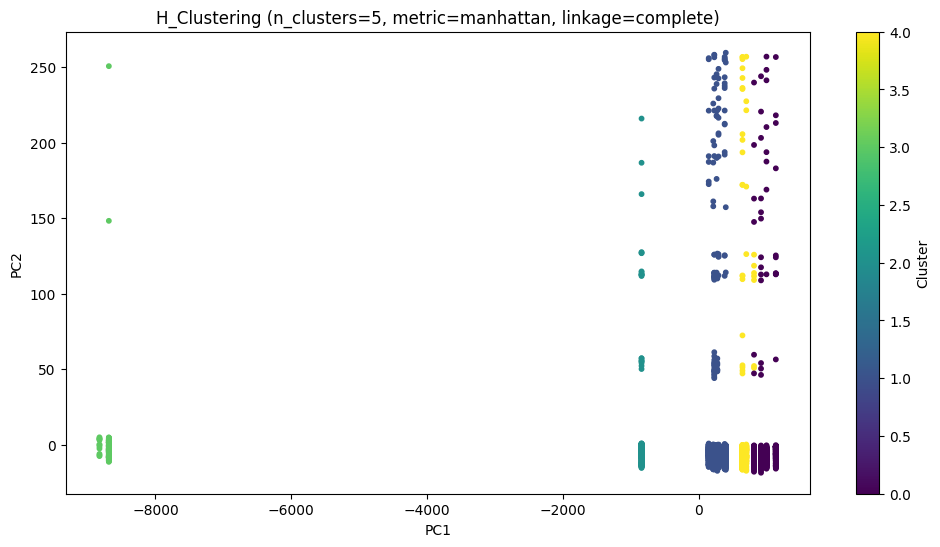

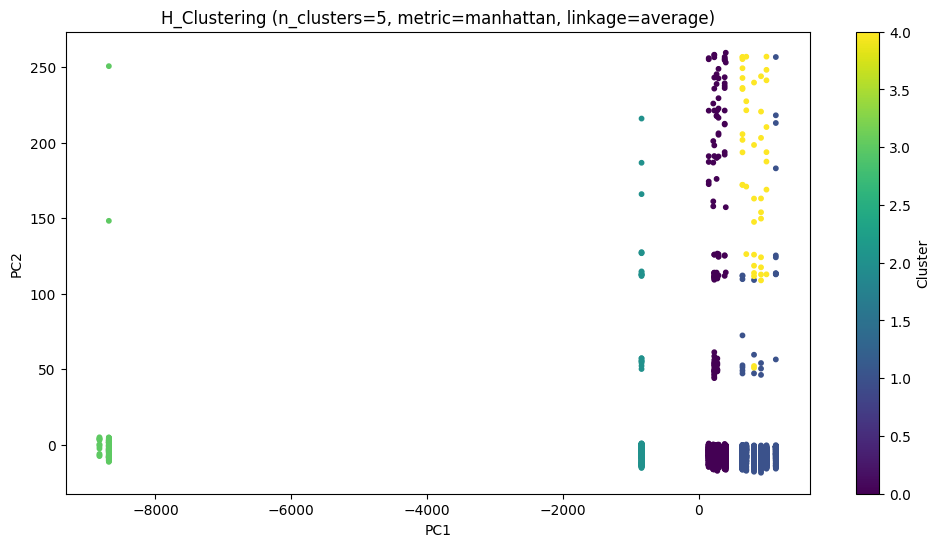

In [96]:
from sklearn.cluster import AgglomerativeClustering

for n_clusters in n_clusters_options:
    for metric in metric_options:
        for linkage in linkage_options:
            if linkage == 'ward' and metric != 'euclidean':
                continue

            hc_comp = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage=linkage)
            hc_comp.fit(X)  # normalized data

            labels = hc_comp.labels_
            rand_index = rand_score(data['Target'], labels)
            adjusted_rand_index = adjusted_rand_score(data['Target'], labels)

            hc_results_raw.append({
                'n_clusters': n_clusters,
                'metric': metric,
                'linkage': linkage,
                'rand_index': rand_index,
                'adjusted_rand_index': adjusted_rand_index
            })

            plt.figure(figsize=(12, 6))
            plt.scatter(scores_for_rawData[:, 0], scores_for_rawData[:, 1], s=10, c=hc_comp.labels_)
            plt.xlabel('PC1')
            plt.ylabel('PC2')
            plt.title(f'H_Clustering (n_clusters={n_clusters}, metric={metric}, linkage={linkage})')
            plt.colorbar(label='Cluster')
            plt.show()


In [97]:
hc_df = pd.DataFrame(hc_results_raw)
print(hc_df)

    n_clusters     metric   linkage  rand_index  adjusted_rand_index
0            2  euclidean      ward    0.409412             0.003988
1            2  euclidean  complete    0.409412             0.003988
2            2  euclidean   average    0.409412             0.003988
3            2  manhattan  complete    0.409412             0.003988
4            2  manhattan   average    0.409412             0.003988
5            3  euclidean      ward    0.511492             0.002773
6            3  euclidean  complete    0.425473            -0.003102
7            3  euclidean   average    0.425473            -0.003102
8            3  manhattan  complete    0.425473            -0.003102
9            3  manhattan   average    0.425473            -0.003102
10           4  euclidean      ward    0.521252             0.001275
11           4  euclidean  complete    0.521252             0.001275
12           4  euclidean   average    0.521252             0.001275
13           4  manhattan  complet